# Sistema de Detecção de Faces Humanas

Nosso sistema deve ser capaz de detectar a região que representa a face, dando suporte para o sistema de classificação a pessoa em questão.

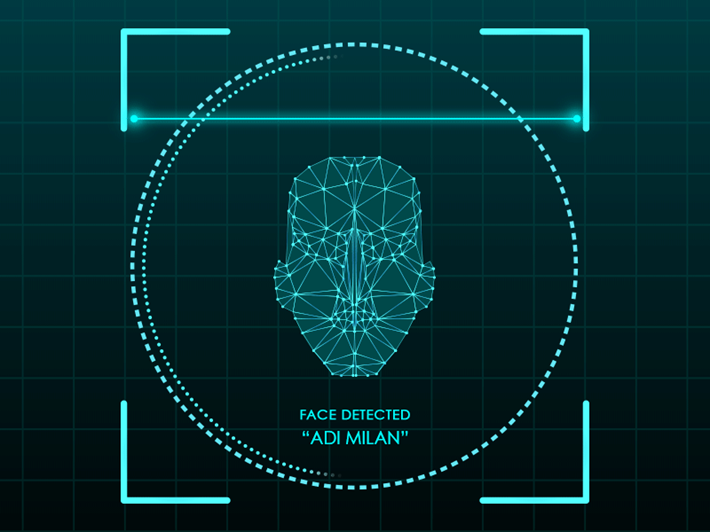

## Importando bibliotecas e requerimentos necessários

In [ ]:
import imutils
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

### Inicializando webcam

Configurando função js para configurar a webcam

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      veido.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element
      google.colab.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for capture to be clicked
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks([0]).stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Clique em "Capture" para fazer a foto usando sua webcam

In [ ]:
# image_file = take_photo()
image_file = 'testimonials-4.jpg'

Leia, redimensione e exiba a imagem

400 400


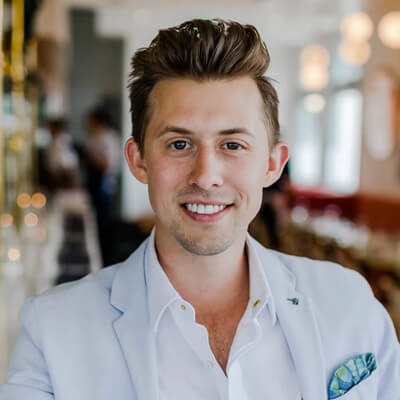

In [ ]:
image = cv.imread(image_file)

# redimensionando a imagem para ter uma largura máxima de 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)

cv2_imshow(image)

## Detector de Face - OpenCV - ResNet

O detecor de face em Deep Learning do OpenCV é baseado na estrutura Single Shot Detector (SSD) com  uma rede base ResNet.

A rede é definida e treinada usando o [Caffe Deep Learning Framework](https://https://caffe.berkeleyvision.org/)


### Baixando o Modelo

Baixe o modelo de detecção de rosto pré-treinado, composto por dois arquivos:

* A definição de rede (deploy.prototxt)
* Os pesos aprendidos (res10_300x300_ssd_iter_140000.caffemodel)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2024-12-27 18:01:19--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2024-12-27 18:01:20 (17.4 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2024-12-27 18:01:20--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

### Carregando o modelo

Carregar o modelo de rede de detecção facial pré-treinado do disco

In [ ]:
print("[INFO] loading model... ")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model... 


### Blob de Entrada

Usando a função dnn.blobFromImage para construir um blob de entrada redimensionando a imagem para 300x300 pixels fixos e a normalizando.

In [ ]:
# redimensiona para ter uma largura máxima de 400 pixels
image = imutils.resize(image, width=400)
blob = cv.dnn.blobFromImage(cv.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
print("[INFO] computing object detections... ")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections... 


## Detectando em Loop

Criaremos um loop para as detecções e desenhar caixas (bounding box) ao redor dos rostos detectados

In [ ]:
for i in range(0, detections.shape[2]):

  # extraindo a probabilidade associada à previsão
  confidence = detections[0,0,i,2]

  # filtrando detecções fracas
  if confidence > 0.5:
    box = detections[0,0,i,3:7] * np.array([w,h,w,h])
    (startX, startY, endX, endY) = box.astype("int")

    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)
    cv.putText(image, text, (startX, y),
                 cv.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)

Apresentando a imagem resultado

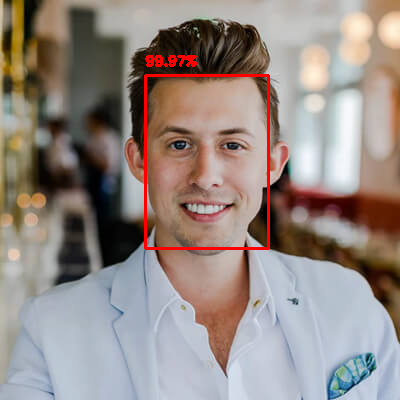

In [ ]:
cv2_imshow(image)